# 0. Homework 7 Evan Varan, lze4

## 0.a Imports

In [428]:
import sys
import scipy as sp
import numpy as np
import matplotlib as mpl
from scipy.fftpack import fft, fftfreq
from scipy import signal

# Print lists nicely
import glob

# Read WAV files
import scipy.io.wavfile as wav

import matplotlib.pyplot as plt
#print(plt.style.available)
plt.style.use('classic')

## 0.b Check Versions, etc

In [429]:
print('Python: \t{:2d}.{:1d}'
      .format(sys.version_info[0], sys.version_info[1]))
print('Matplot:\t',mpl.__version__)
print('Numpy:  \t',np.__version__)
print('SciPy:  \t',sp.__version__)

Python: 	 3.12
Matplot:	 3.8.2
Numpy:  	 1.26.3
SciPy:  	 1.12.0rc2


# 1. Read a "WAV" file 
WAV files are probably familiar to you from playing music on the computer, etc. WAV is an audio file-format popularized by Microsoft. In addition to samples of a signal (in various formats), it contains some "meta data" that simplifies things a bit, like sampling rate, type of data, type of compression used, and so on.

Try these experiments with both of the included files: "sin400.wav" and "chirp.wav"

## 1.a Read the original file
This is a sinusoid at 400Hz, sampled at 2000 samples/sec, and duration of about 0.1 sec

In [430]:
Fs, signal = wav.read('sin400.wav')

## 1.b Write the same data to a different file
Notic that the sampling rate is being changed (in the WAV file), but the data is the same.

In [431]:
wav.write('sin400_newFs.wav', Fs // 2, signal)

# 2. Read the tweaked file and compare with the original

In [432]:
nFs, nsignal = wav.read('sin400_newFs.wav')

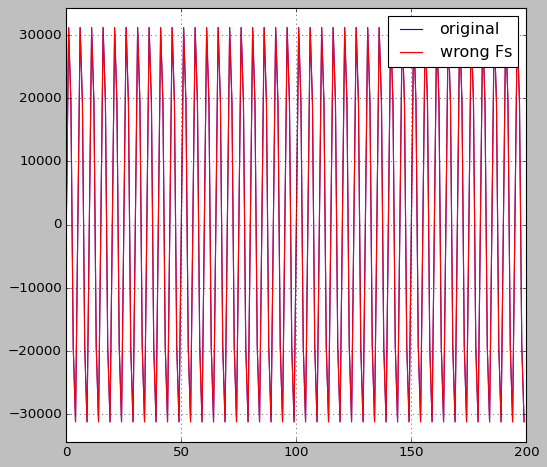

In [433]:
# Quick plot 
plt.figure(figsize=(7,6))

plt.plot(signal, color='blue', label='original')
plt.plot(nsignal, color='red', label='wrong Fs')

mm = 1.1* max(np.maximum(signal, nsignal))
plt.ylim(-mm,mm) 

plt.grid()
plt.legend()
plt.tight_layout()
plt.show()

# Questions
Listen to both files on your computer. You should have a program already installed that can read and play WAV files on your computer.
1. How does the modified one compare to the original one? - The modified file is lower in pitch than the original file.
    * What happened to the WAV file when we changed its sampling rate? - Its pitch became lower. It will have fewer samples per time than the original.
    * Why do the plots overlap exactly? - This is because we are not plotting in relation to the time domain.


# 3. Creating Our Own Wave file

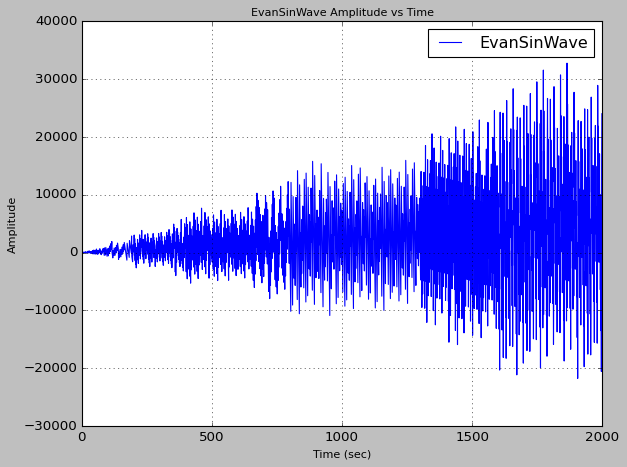

In [434]:
f1 = 200
f2 = 400
duration = 10.0
Fs = 200
t = np.arange(0, duration, 1/Fs)
sine_wave_200hz = np.sin(2 * np.pi * f1 * t)
sine_wave_400hz = np.sin(2 * np.pi * f2 * t)
sine_wave = sine_wave_200hz + sine_wave_400hz

# Convert to 16-bit so I can open it and listen
sine_wave_int16 = np.int16(sine_wave / np.max(np.abs(sine_wave)) * 32767)

wav.write('EvanSinWave.wav', Fs, sine_wave_int16)
nFs, nsine_wave = wav.read('EvanSinWave.wav')

plt.plot(nsine_wave, color='blue', label='EvanSinWave')
plt.title('EvanSinWave Amplitude vs Time', fontsize='small')
plt.xlabel('Time (sec)', fontsize='small')
plt.ylabel('Amplitude', fontsize='small')
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()

# 4. Adding Noise to the file

Helper Functions:

In [435]:
def add_noise_with_snr(signal, target_db):
    signal_power = np.mean(signal ** 2)
    target_db = 10 ** (target_db / 10) 
    noise_power = signal_power / target_db
    
    # Create the noise and addd it to the signal
    noise = np.random.normal(0, np.sqrt(noise_power), signal.shape)
    noise_signal = signal + noise
    noise_signal_int16 = np.int16(noise_signal / np.max(np.abs(noise_signal)) * 32767)
    return noise_signal_int16

def create_new_wave(original_signal, change_in_dB):
    
    sine_wave_noise = add_noise_with_snr(original_signal, change_in_dB)
    wav.write(f'EvanSinWaveWith{change_in_dB}dB.wav', Fs, sine_wave_noise)
    new_dB_Fs, new_dB_sine_wave = wav.read(f'EvanSinWaveWith{change_in_dB}dB.wav')
    
    plt.plot(new_dB_sine_wave, color='blue', label=f'EvanSinWave with {change_in_dB} dB of noise')
    plt.plot(original_signal, color='red', label='EvanSinWave Original')
    plt.title(f'EvanSinWave{change_in_dB}dB Amplitude vs Time', fontsize='small')
    plt.xlabel('Time (sec)', fontsize='small')
    plt.ylabel('Amplitude', fontsize='small')
    plt.grid()
    plt.legend()
    plt.tight_layout()
    plt.show()

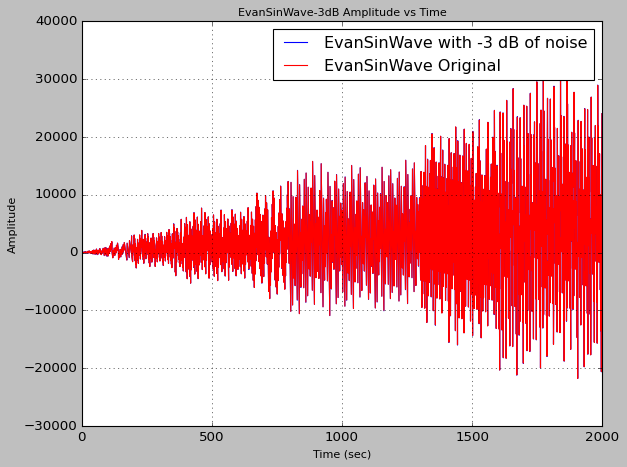

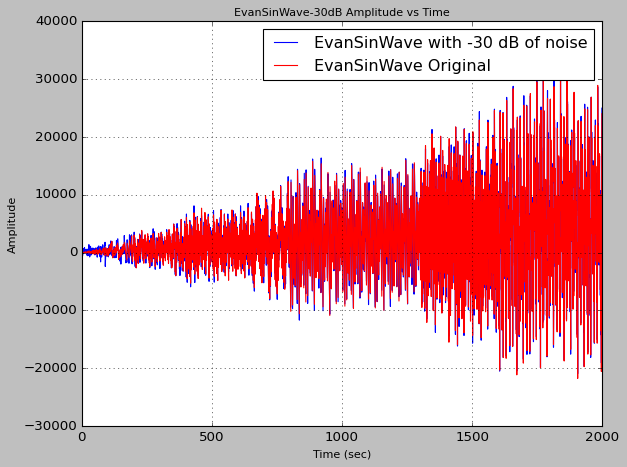

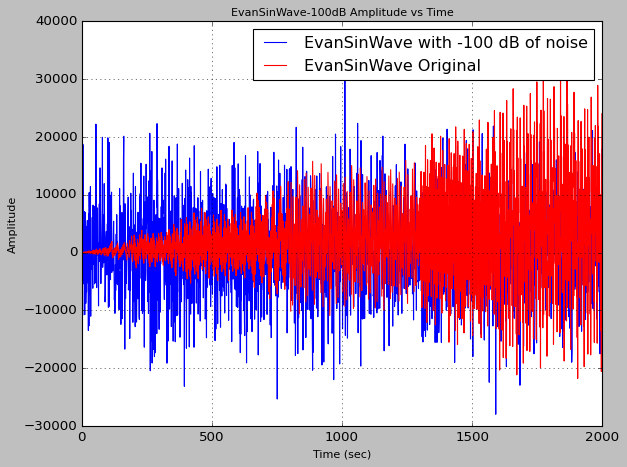

In [436]:
#Trying with -3dB , -30dB, -100dB
create_new_wave(sine_wave_int16,-3)
create_new_wave(sine_wave_int16,-30)
create_new_wave(sine_wave_int16,-100)


# 4.a Observations:
When listening to the outputted wav files from the -3dB, -30dB, and -100dB tests, I found the higher the number (ignoring the negative), the
louder the sound is. You can see this through graphs above in their amplitudes.